**Age** : age - yaş

**job:** type of job - meslek

**marital**: marital status - medeni hali

**education**: education - eğitim

**default**: has credit in default - kredi var mı yok mu

**balance**: average yearly balance - ortalama yıllık gelir

**housing** - has housing loan - konut kredisi

**loan**: has personal loan  - bireysel kredi

**contact**: communaction type - iletişim türü

**day_of_week**: last contact day of the week	- son iletişime geçilen gün

**month**: last contact month of year - son iteşime geçilen ay

**duration**: last contact duration - iletişim süresi

**campaign**: number of contacts performed during this campaign and for this client - kampanya sırasında yapılan iletişim sayısı

**pdays**: number of days that passed by after the client was last contacted from a previous campaign - son kampanyadan bugüne geçen gün sayısı

**previous**: number of contacts performed before this campaign and for this client	bu kampanyadan önce yapılan ilteişim sayısı

**poutcome**: outcome of the previous marketing campaign - önceki kampanyanın sonucu

**y**: has the client subscribed a term deposit?	- müşteri abone oldu mu?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-full.csv',sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = bank.copy()

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
cat_columns = df.select_dtypes(include="object").columns
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
for i in cat_columns:
  print(i,":",df[i].unique(), " --------- " , len(df[i].unique()))
  print("")

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']  ---------  12

marital : ['married' 'single' 'divorced']  ---------  3

education : ['tertiary' 'secondary' 'unknown' 'primary']  ---------  4

default : ['no' 'yes']  ---------  2

housing : ['yes' 'no']  ---------  2

loan : ['no' 'yes']  ---------  2

contact : ['unknown' 'cellular' 'telephone']  ---------  3

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']  ---------  12

poutcome : ['unknown' 'failure' 'other' 'success']  ---------  4

y : ['no' 'yes']  ---------  2



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_cols = ["marital","education","default","housing","loan","contact","poutcome","y"]
for i in label_cols:
  df[i] = le.fit_transform(df[i])

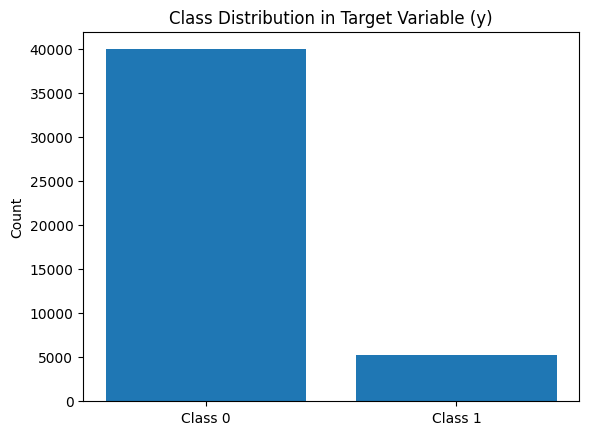

In [ ]:
class_counts = df['y'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.ylabel('Count')
plt.title('Class Distribution in Target Variable (y)')
plt.show()

<Axes: title={'center': 'Feature-correlation (pearson)'}>

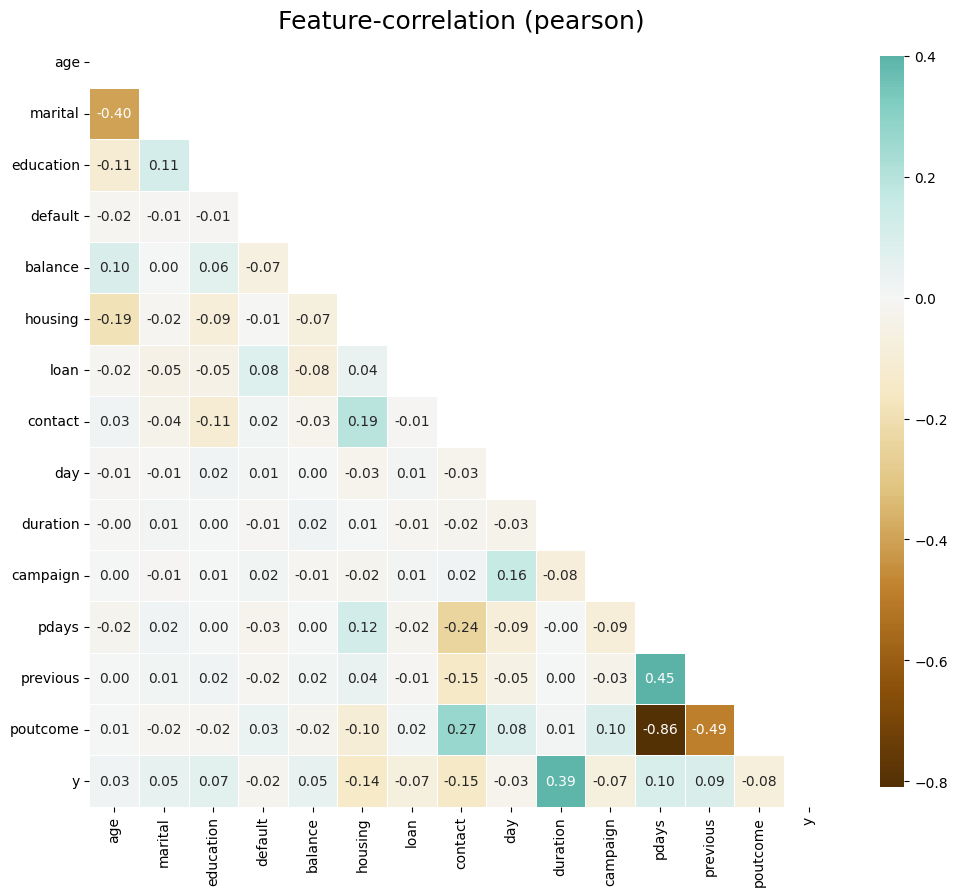

In [ ]:
!pip install klib
import klib
klib.corr_plot(df)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

cols = df.select_dtypes(include=["int64","float64"]).columns

X = df[cols.drop("y")]
y = df['y']

mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

duration     0.074039
poutcome     0.036806
pdays        0.025350
balance      0.021834
housing      0.018227
contact      0.016175
age          0.012942
previous     0.012742
marital      0.007426
education    0.007413
campaign     0.005283
day          0.004347
loan         0.004188
default      0.001814
dtype: float64


In [ ]:
df.drop(["previous","default","pdays"],axis=1,inplace=True)

In [ ]:
ohe_cols = ["job","month"]

for i in ohe_cols:
  from sklearn.preprocessing import OneHotEncoder
  ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False,)
  datas = ohe.fit_transform(df[[i]])
  encoded_cols = pd.DataFrame(datas,columns=ohe.get_feature_names_out([i]))
  df = pd.concat([df,encoded_cols],axis=1)
  df.drop(i,axis=1,inplace=True)

In [ ]:
df.head()

,age,marital,education,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1,2,2143,1,0,2,5,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,2,1,29,1,0,2,5,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,1,1,2,1,1,2,5,76,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,1,3,1506,1,0,2,5,92,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,2,3,1,0,0,2,5,198,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
num_cols = ["age","balance","day","duration","campaign"]
for i in num_cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print(i,":",lower_bound,upper_bound)

  if (df[i] < lower_bound).any():
    df.loc[df[i] < lower_bound, i] = lower_bound
  if (df[i] > upper_bound).any():
    df.loc[df[i] > upper_bound, i] = upper_bound

age : 10.5 70.5
balance : -1962.0 3462.0
day : -11.5 40.5
duration : -221.0 643.0
campaign : -2.0 6.0


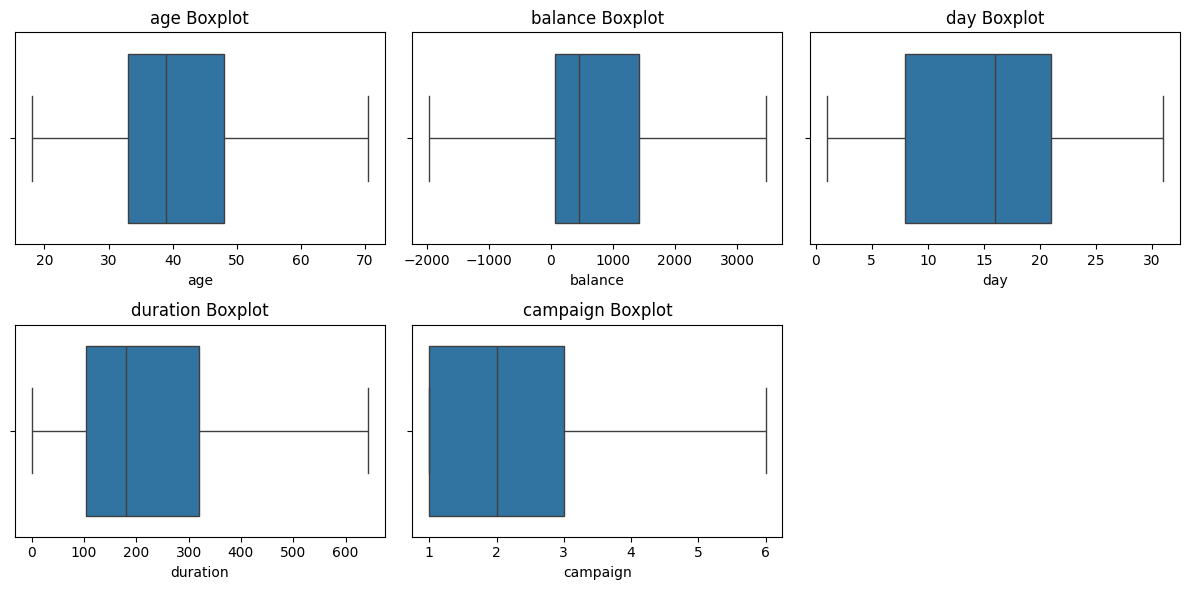

In [ ]:
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,marital,education,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,2,2143,1,0,2,5,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44.0,2,1,29,1,0,2,5,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33.0,1,1,2,1,1,2,5,76,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47.0,1,3,1506,1,0,2,5,92,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33.0,2,3,1,0,0,2,5,198,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
!pip install klib
import klib

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("y",axis=1)
y = df["y"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 35)
(11303, 35)
(33908,)
(11303,)


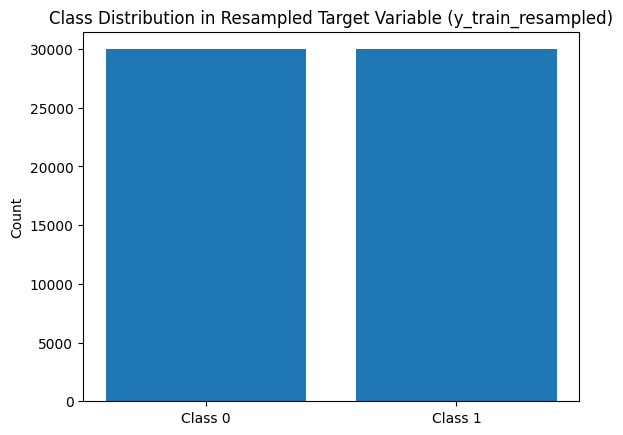

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

class_counts = Counter(y_train)
plt.bar(list(class_counts.keys()), list(class_counts.values()))
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.ylabel('Count')
plt.title('Class Distribution in Resampled Target Variable (y_train_resampled)')
plt.show()

In [ ]:
klib.data_cleaning(df)

Shape of cleaned data: (45211, 36) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 7.55 MB (-60.79%)



,age,marital,education,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,2,2143,1,0,2,5,261,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44.0,2,1,29,1,0,2,5,151,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33.0,1,1,2,1,1,2,5,76,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47.0,1,3,1506,1,0,2,5,92,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33.0,2,3,1,0,0,2,5,198,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,1,2,825,0,0,0,17,643,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,70.5,0,0,1729,0,0,0,17,456,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,70.5,1,1,3462,0,0,0,17,643,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,57.0,1,1,668,0,0,1,17,508,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_preds = rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_preds)

0.9029461204989826

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_preds)

array([[9550,  400],
       [ 697,  656]])

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9950
           1       0.62      0.48      0.54      1353

    accuracy                           0.90     11303
   macro avg       0.78      0.72      0.75     11303
weighted avg       0.89      0.90      0.90     11303



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBClassifier


models = ["rf", "lr", "svc", "xgb"]
accuracy_scores = []

for model_name in models:
    if model_name == "rf":
        model = RandomForestClassifier(random_state=1)
    elif model_name == "lr":
        model = LogisticRegression( random_state=1)
    elif model_name == "svc":
        model = SVC(random_state=1)
    elif model_name == "xgb":
        model = XGBClassifier(random_state=1)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)

    accuracy_scores.append(accuracy)
    print(f"{model_name} Accuracy: {accuracy}")

rf Accuracy: 0.9017075112801911
lr Accuracy: 0.8367689993806954
svc Accuracy: 0.8940989117933292
xgb Accuracy: 0.9036538971954349


In [ ]:
!pip install optuna
import optuna

def objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
    'max_depth': trial.suggest_int('max_depth', 3, 10),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
    'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    'gamma': trial.suggest_float('gamma', 0, 5),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)}

    scale_pos_weight = len(y[y == 0]) / len(y[y == 1])
    model = XGBClassifier(**params, random_state=1,scale_pos_weight=scale_pos_weight)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)

    trial.report(accuracy, trial.number)
    if trial.should_prune():
        raise optuna.TrialPruned()

    return accuracy




study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("best params:", study.best_params)
print("best accuracy:", study.best_value)

[I 2024-11-23 18:31:01,813] A new study created in memory with name: no-name-cc60ebf7-f02d-43d1-8070-4e0cf3b1decf
[I 2024-11-23 18:31:19,536] Trial 0 finished with value: 0.8616296558435813 and parameters: {'n_estimators': 817, 'max_depth': 6, 'learning_rate': 0.07075614812515256, 'subsample': 0.9615890666166904, 'colsample_bytree': 0.8305718843692728, 'gamma': 3.3354588607783264, 'min_child_weight': 2}. Best is trial 0 with value: 0.8616296558435813.
[I 2024-11-23 18:31:25,214] Trial 1 finished with value: 0.831726090418473 and parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.01962315201263695, 'subsample': 0.5149713956683744, 'colsample_bytree': 0.8791502961552198, 'gamma': 3.661014516648062, 'min_child_weight': 4}. Best is trial 0 with value: 0.8616296558435813.
[I 2024-11-23 18:31:30,106] Trial 2 finished with value: 0.8595947978412811 and parameters: {'n_estimators': 256, 'max_depth': 7, 'learning_rate': 0.16006591621606858, 'subsample': 0.918317377775022, 'col

best params: {'n_estimators': 693, 'max_depth': 10, 'learning_rate': 0.06588030223679575, 'subsample': 0.5642497991694931, 'colsample_bytree': 0.7411857851964274, 'gamma': 0.041244544730361654, 'min_child_weight': 3}
best accuracy: 0.8987879324073255


In [ ]:
from xgboost import XGBClassifier

model_tuned = XGBClassifier(n_estimators=892,
                            max_depth=5,
                            learning_rate=0.04564265377625872,
                            subsample= 0.9566010266812784,
                            colsample_bytree= 0.8569200103384913,
                            gamma= 0.0029313138093278734,
                            min_child_weight= 10).fit(X_train,y_train)
y_preds = model_tuned.predict(X_test)
accuracy_score(y_test,y_preds)

0.9063965318941873

In [ ]:
confusion_matrix(y_test,y_preds)

array([[9516,  434],
       [ 624,  729]])

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
auc_score = roc_auc_score(y_test, y_preds)
print("AUC Score:", auc_score)

classification_rep = classification_report(y_test, y_preds)
print("Classification Report:\n", classification_rep)

AUC Score: 0.7475922851508094
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9950
           1       0.63      0.54      0.58      1353

    accuracy                           0.91     11303
   macro avg       0.78      0.75      0.76     11303
weighted avg       0.90      0.91      0.90     11303



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

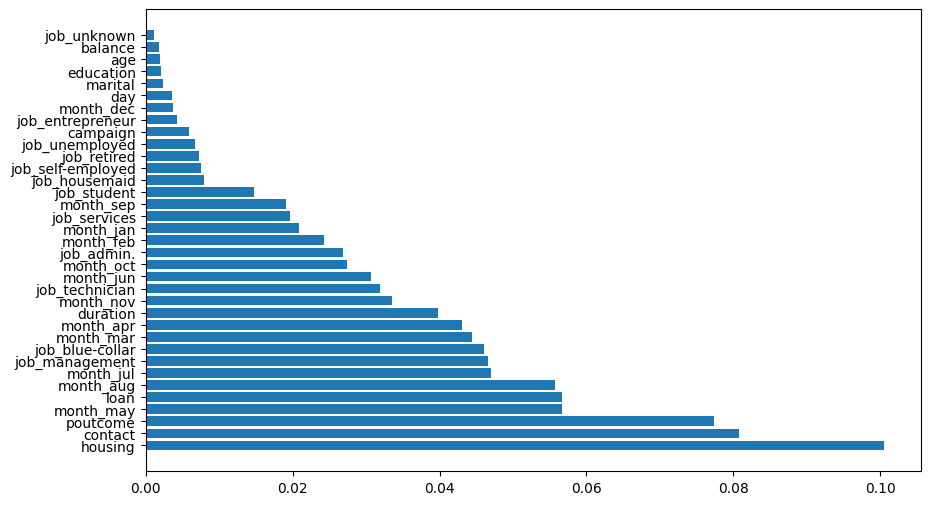

In [ ]:
feature_importances = model_tuned.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': model_tuned.feature_importances_})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt